In [1]:
%reload_ext dotenv
%dotenv

In [13]:
from tqdm.notebook import tqdm
import pandas as pd
from typing import Optional, List, Tuple
import matplotlib.pyplot as plt
from datasets import Dataset, load_dataset

from langchain.docstore.document import Document as LangchainDocument
from langchain.text_splitter import RecursiveCharacterTextSplitter

from sentence_transformers import SentenceTransformer

from transformers import AutoTokenizer

pd.set_option('display.max_colwidth', None)

In [3]:
ds = load_dataset("m-ric/huggingface_doc", split='train')

In [5]:
RAW_KB = [ LangchainDocument(page_content=doc['text'], metadata={'source': doc['source']}) for doc in tqdm(ds)]

  0%|          | 0/2647 [00:00<?, ?it/s]

#### Recursive Chunking

- Breakdown the text using a list of separators sorted from the most imp to least
- If first sep doesnt provide the right chunk size, go to next and so on

In [11]:
MARKDOWN_SEP = [
                "\n#{1,6} ",
                "```\n",
                "\n\\*\\*\\*+\n",
                "\n---+\n",
                "\n___+\n",
                "\n\n",
                "\n",
                " ",
                ""
            ]

text_splitter = RecursiveCharacterTextSplitter(
                    chunk_size=1000,
                    chunk_overlap=100,
                    add_start_index=True,
                    strip_whitespace=True,
                    separators=MARKDOWN_SEP

)

docs_processed=[]

for doc in RAW_KB:
    docs_processed += text_splitter.split_documents([doc])

In [12]:
print(f"Model's max seq len: {SentenceTransformer("thenlper/gte-small").max_seq_length}")

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model's max seq len: 512


Chunk size should be smaller than max seq len of the model otherwise chunk embeddings will lose relevance

  0%|          | 0/31085 [00:00<?, ?it/s]

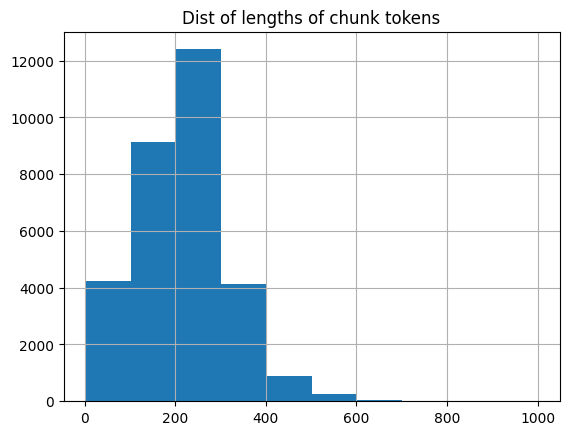

In [16]:
tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")

lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]

fig = pd.Series(lengths).hist()
plt.title("Dist of lengths of chunk tokens")
plt.show()

In [ ]:
def split_documents(
                    chunk_size: int,
                    
)